<a href="https://colab.research.google.com/github/biangomes/projetos-e-estudos/blob/main/EDA_Mercado_de_Trabalho_Desenvolvedores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados sobre o mercado de trabalho para desenvolvedores de software que frequentaram treinamentos Bootcamp

**Objetivo:** análise e exploração dos dados, verificando problemas, como tratá-los, dentre outras coisas.

**Fonte:**
- Data Science Academy;

- [Link dataset](https://www.freecodecamp.com)


In [47]:
# Importando biblioteca para manipulacao dos dados
import pandas as pd

# Importando bibilioteca para visualizacao de graficos
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')

# Importando bibilioteca para processamento numerico
import numpy as np

# Importando modulos para warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

In [84]:
# Carregando o dataset
df = pd.read_csv("Dados-Pesquisa.csv")

# Visualizando as primeiras entradas
df.head()

# Visualizando informações estatísticas
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,ExpectedEarning,FinanciallySupporting,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDiabilitiesBenefits,IsSoftwareDev,...,PodcastCodeNewbie,PodcastCodingBlocks,PodcastDeveloperTea,PodcastDotNetRocks,PodcastHanselminutes,PodcastJSJabber,PodcastJsAir,PodcastNone,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodeWars,ResourceCodecademy,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,2077.0,2898.0,18.0,22.0,558.0,2422.0,313.0,480.0,8900.0,255.0,14.0,743.0,711.0,23.0,8339.000000,6077.000000,3996.000000,4012.000000,13610.000000,13640.000000,13625.000000,6371.000000,13550.000000,6371.000000,1.501000e+03,14942.000000,7329.000000,13645.000000,13530.000000,15537.000000,...,1878.0,16.0,80.0,18.0,19.0,1356.0,29.0,11040.0,34.0,79.0,775.0,83.0,41.0,15.0,30.0,144.0,1563.0,9586.0,4844.0,968.0,3472.0,29.0,10937.0,55.0,30.0,3746.0,150.0,26.0,1687.0,3565.0,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175714,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55.304473,53717.586967,0.196697,0.642822,0.470683,0.295528,0.879339,0.280176,0.076236,0.589546,1.897040e+05,15.323317,44930.010506,0.238402,0.022912,0.276952,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017580,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.442833,30078.511957,0.397551,0.479228,0.499158,0.456296,0.325744,0.449120,0.265385,0.491955,4.547212e+05,14.274867,35582.783216,0.426122,0.149629,0.447507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6000.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.200000e+04,5.000000,20000.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.

# Distribuição de Idade

**Hipótese:** a maioria dos desenvolvedores tem entre 20 e 30 anos, sendo 25 anos a idade mais comum.

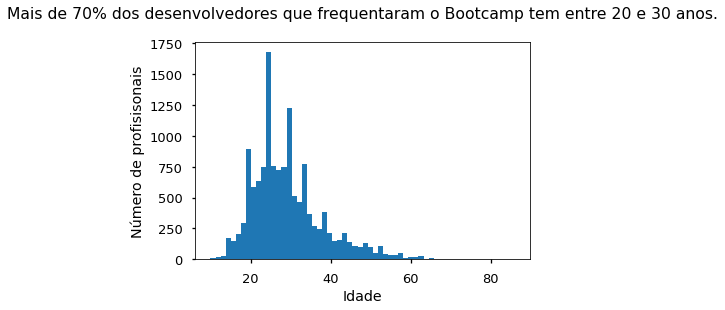

In [78]:
df.Age.hist(bins=60, grid=False)  # bins: quantidade de colunas, caixinhas
plt.xlabel("Idade")
plt.ylabel("Número de profisisonais")
plt.title("Mais de 70% dos desenvolvedores que frequentaram o Bootcamp tem entre 20 e 30 anos.\n")
plt.show();

Verificando alguns dados sobre a coluna `Age`.

In [50]:
print(f"Média da coluna Age: {df.Age.mean()}\n\n")

# Hipotese: mais de 70% dos programadores do bootcamp tem entre 20 e 30 anos.
entre_vinte_trinta = df.loc[(df.Age >= 20.0) & (df.Age < 30.0), 'Age']

qtd_vinte_trinta = entre_vinte_trinta.count()

porcentagem = (qtd_vinte_trinta * 100) / df.Age.count()
print(f"{porcentagem.round(2)}% dos programadores têm entre 20 e 30 anos.")

Média da coluna Age: 29.17571439065599


51.25% dos programadores têm entre 20 e 30 anos.


# Distribuição de Sexo

**Hipótese:** a maioria dos programadores são do sexo feminino.

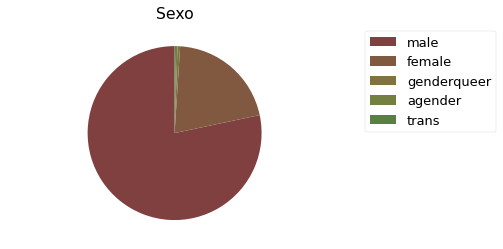

In [51]:
# Definindo a quantidade
labels = df.Gender.value_counts().index  # coleta os tipos de sexo
# Calculando a quantidade para cada label
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors=listaRGB, startangle=90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor=(1.05, 1))
plt.title("Sexo")
plt.show();

#Distribuição de Interesses

**Hipótese:** os profissionais participantes da pesquisa tem preferências pelas áreas de desenvolvimento web (*full stack, front end e back end*), seguido por *Data Science*.

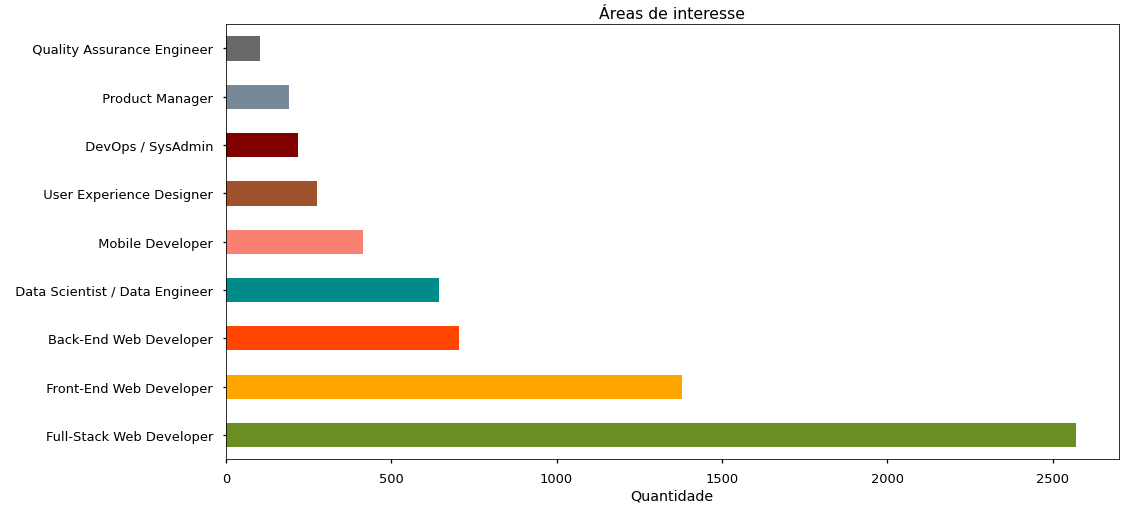

In [82]:
# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.JobRoleInterest.value_counts().index
list_of_colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Visualizando os dados
df.JobRoleInterest.value_counts().plot.barh(figsize=(16,8), color=list_of_colors);
plt.xlabel("Quantidade");
plt.title("Áreas de interesse");

# Distribuição de Empregabilidade

**Hipótese:** além das áreas de tecnologia, áreas como finanças e saúde também são significativas no bootcamp.

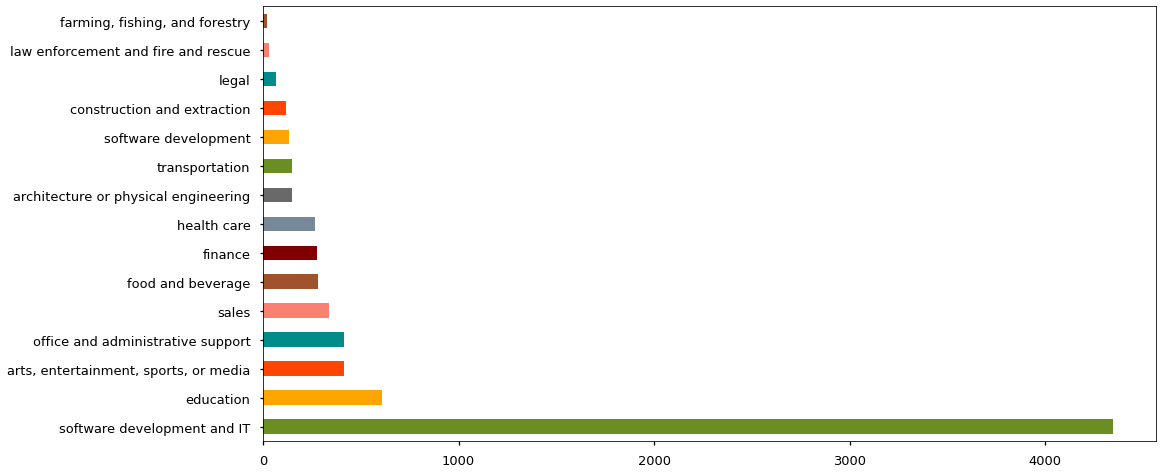

In [70]:
# Analise da coluna EmploymentField
df.EmploymentField.value_counts().plot.barh(figsize=(16,8), color=list_of_colors);

# Preferência de Trabalho por Idade


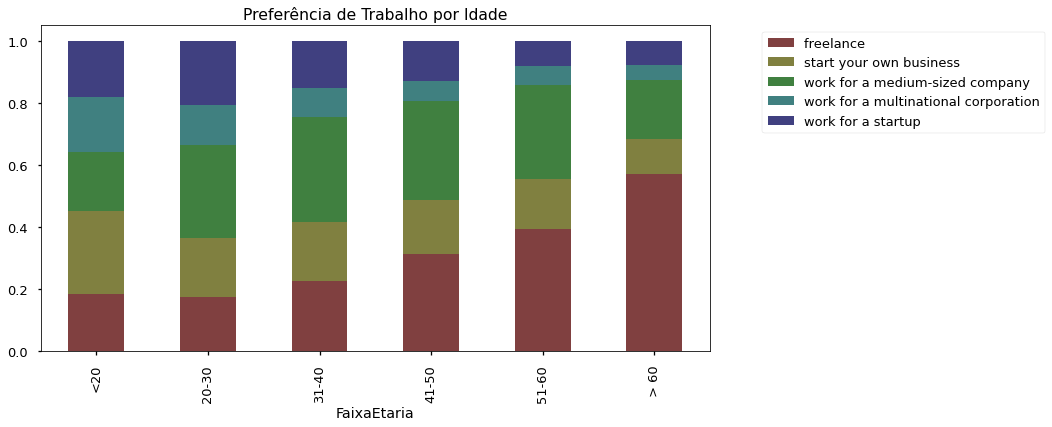

In [98]:
# Criando cópia do dataframe original para fazermos modificações
df_copy = df.copy()
# Lista de valores
bins = [0, 20, 30, 40, 50, 60, 100]

# Criando uma coluna para faixa etaria chamada AgeRanges
df_copy['FaixaEtaria'] = pd.cut(df_copy['Age'],
                         bins,
                         labels=["<20", "20-30", "31-40", "41-50", "51-60", " > 60"])

# Cruzamento de tabelas (crosstab)
df2 = pd.crosstab(df_copy['FaixaEtaria'],
                  df_copy['JobPref']).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(df_copy.FaixaEtaria.value_counts().index)                  

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df2.plot.bar(stacked=True, color=listaRGB, title="Preferência de Trabalho por Idade", figsize=(12,6));
lines, labels = ax1.get_legend_handles_labels();
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1));